# Análise do conjunto de dados "Spotify Track Genres"

#Dupla: Anna Carolina Farias e Gabrielly Castilho

#Perguntas a serem respondidas
Focamos nos gêneros musicais e, a partir disso, fizemos questões relacionadas.
1. Qual a média de duração das faixas por gênero?
2. Quais são os gêneros mais populares?

Hopóteses:
1. Músicas explícitas são mais populares?
2. Músicas com maior duração são menos populares?
3. Músicas mais alegres são mais dançáveis?


# Descrição dos dados

artists: Nome dos artistas da faixa. (string)

album_name: Nome do álbum da faixa. (string)

track_name: Nome da faixa. (string)

popularity: Popularidade da faixa no spotify, de 0 a 100. (inteiro)

duration_ms: Duração da faixa em milisegundos. (inteiro)

explicit: Valor booleano para indicar se a faixa contém conteúdo explícito ou não. (boolean)

danceability: Um valor entre 0 e 1 para indicar quão adequada a faixa é para dançar baseada em vários elementos musicais. (float)

energy: Medida da intensivade e da atividade da faixa, o valor varia entre 0 e 1. (float)

key: Diferentes tonalidades musicais atribuídas a inteiros variando de 0 a 11. (inteiro)

loudness: A intensidade da faixa em decibéis (dB). (float)

mode: O modo tonal de uma faixa, representado por um valor inteiro (0 para menor, 1 para maior). (inteiro)

speechiness: Um valor entre 0 e 1 que representa a presença de palavras faladas na faixa. (float)

acousticness: Um valor entre 0 e 1 que representa a presença de uma qualidade acústica na faixa. (float)

instrumentalness: Um valor entre 0 e 1 que representa a possibilidade de uma faixa ser instrumental. (float)

liveness: Um valor entre 0 e 1 que representa a presença de um público durante a gravação ou a performance da faixa. (float)

valence: Um valor entre 0 e 1 que representa a positividade musical contida na faixa. (float)

tempo: Velocidade ou o ritmo da música em batidas por minuto. (BPM). (float)

time_signature: Número de batidas em cada compasso da música. (inteiro)

track_genre: O gênero da faixa. (string)

https://www.kaggle.com/datasets/thedevastator/spotify-tracks-genre-dataset

Importando as bibliotecas


In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go

Leitura do dataset

In [83]:
genres = pd.read_csv('https://raw.githubusercontent.com/gabscastilho/ICD_Panda/main/train.csv')

Verificar como o dataset está apresentado

In [ ]:
genres.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [ ]:
genres.shape

(114000, 21)

O dataset apresenta 114000 linhas e 21 colunas.

In [62]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Vamos retirar as colunas "key", "Unnamed 0" e "album_name" pois elas não têm serventia para o nosso propósito.

In [84]:
genres[['key']]

key
0         1
1         1
2         0
3         0
4         2
...     ...
113995    5
113996    0
113997    0
113998    7
113999    1

[114000 rows x 1 columns]

In [85]:
genres = genres.drop(['key'], axis=1)

In [65]:
# Informações sobre os atributos numéricos, como média, número de amostras, mediana, min, max, quartis, etc
genres.describe()

popularity   duration_ms   danceability         energy  \
count  114000.000000  1.140000e+05  114000.000000  114000.000000   
mean       33.238535  2.280292e+05       0.566800       0.641383   
std        22.305078  1.072977e+05       0.173542       0.251529   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

            loudness           mode    speechiness   acousticness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean       -8.258960       0.637553       0.084652       0.314910   
std         5.029337       0.480709       0.105732       0.332523   
min       -49.531000       0.000000       0.000000       0.000000   
25%       -10.013000       0.000000       0.035900       0.016900   
50%        -7.004000       1.000000       0.048900       0.169000   
75%        -5.003000       1.000000       0.084500       0.598000   
max         4.532000       1.000000       0.965000       0.996000   

       instrumentalness       liveness        valence          tempo  \
count     114000.000000  114000.000000  114000.000000  114000.000000   
mean           0.156050       0.213553       0.474068     122.147837   
std            0.309555       0.190378       0.259261      29.978197   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.098000       0.260000      99.218750   
50%            0.000042       0.132000       0.464000     122.017000   
75%            0.049000       0.273000       0.683000     140.071000   
max            1.000000       1.000000       0.995000     243.372000   

       time_signature  
count   114000.000000  
mean         3.904035  
std          0.432621  
min          0.000000  
25%          4.000000  
50%          4.000000  
75%          4.000000  
max          5.000000

In [86]:
# Não tem atributos duplicados
genres.duplicated().sum()

0

#Atibutos Faltantes

Há um objeto que possui artists, album_name e track_name NaN.

In [87]:
genres.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

É possível verificar que é um único objeto com esses 3 atributos nulos.

In [88]:
genres[genres['artists'].isna()]

Unnamed: 0                track_id artists album_name track_name  \
65900       65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

       popularity  duration_ms  explicit  danceability  energy  loudness  \
65900           0            0     False         0.501   0.583     -9.46   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
65900     0       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop

Portanto, retiramos ele do dataset.

In [89]:
genres = genres.drop(65900)

In [90]:
genres.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

#Atributos Ruidosos

##Para verificar se há atributos ruidosos, é necessário explorar os dados. Para isso abaixo é feita análise gráfica dos dados numéricos.

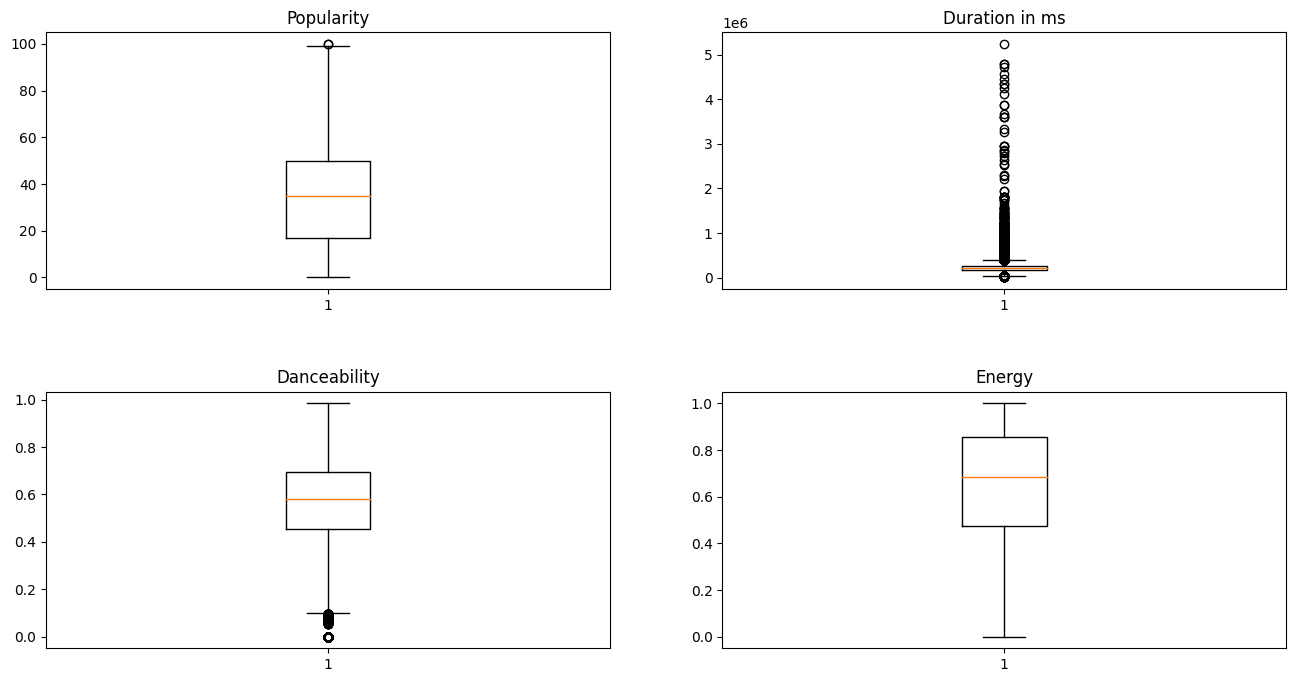

In [12]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)


ax1.boxplot(x=genres['popularity'])
ax1.set_title('Popularity')


ax2.boxplot(x=genres['duration_ms'])
ax2.set_title('Duration in ms')


ax3.boxplot(x=genres['danceability'])
ax3.set_title('Danceability')


ax4.boxplot(x=genres['energy'])
ax4.set_title('Energy')
fig.show()

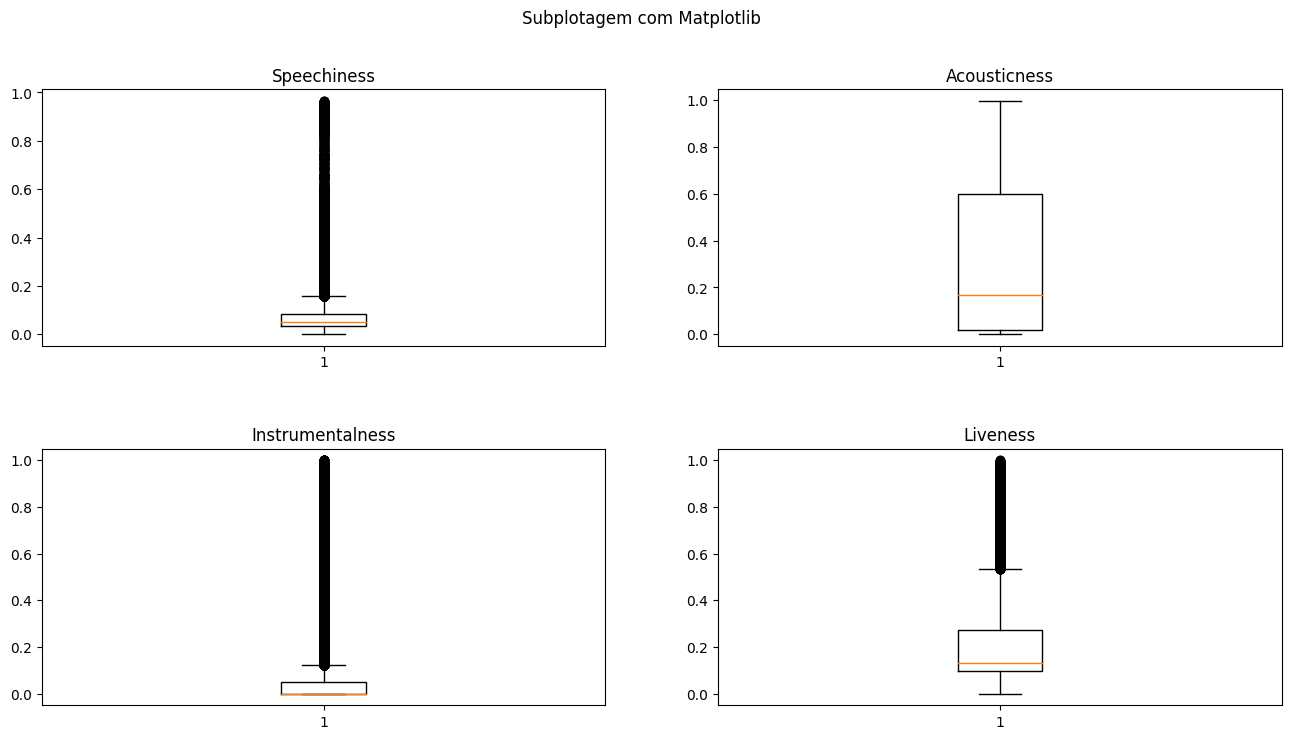

In [13]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(16, 8))
fig.suptitle('Subplotagem com Matplotlib')
fig.subplots_adjust(hspace=0.4, wspace=0.2)


ax1.boxplot(x=genres['speechiness'])
ax1.set_title('Speechiness')


ax2.boxplot(x=genres['acousticness'])
ax2.set_title('Acousticness')


ax3.boxplot(x=genres['instrumentalness'])
ax3.set_title('Instrumentalness')


ax4.boxplot(x=genres['liveness'])
ax4.set_title('Liveness')
fig.show()

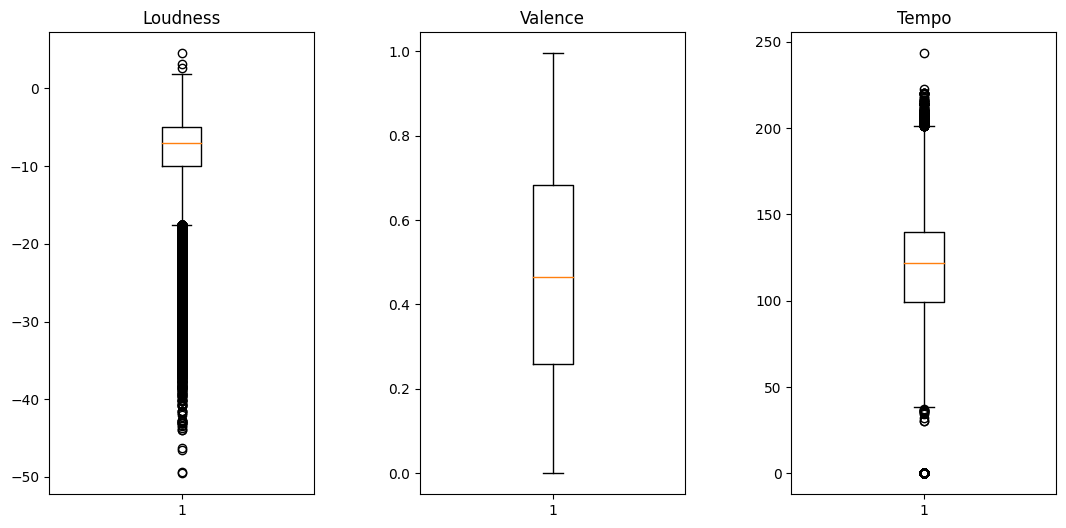

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 6))
fig.subplots_adjust(wspace=0.4)

ax1.boxplot(x=genres['loudness'])
ax1.set_title('Loudness')

ax2.boxplot(x=genres['valence'])
ax2.set_title('Valence')

ax3.boxplot(x=genres['tempo'])
ax3.set_title('Tempo')

plt.show()


#Outliers

Para detectar os outliers, utilizamos o box plot para verificar quais valores ficam fora dos limites superior e inferior.

###Duration_ms

O gráfico de duração mostra que a maioria das músicas estão entre 392.565ms (6,54m) e 8586ms (8,586s)

In [91]:
fig = px.box(genres, y="duration_ms")
fig.show()

Decidimos calcular o limite inferior e superior para excluir dados acima e abaixo desses valores.

In [92]:
q1 = np.percentile(genres['duration_ms'], 25)
q3 = np.percentile(genres['duration_ms'], 75)

iqr = q3 - q1

limite_superior = q3 + 1.5 * iqr
limite_inferior = q1 - 1.5 * iqr

In [93]:
genres_limpo = genres[(genres['duration_ms'] >= limite_inferior) & (genres['duration_ms'] <= limite_superior)]

Abaixo é o gráfico após a exclusão dos outliers.

In [94]:
#Boxplot para ver a diferença da coluna após a retirada dos outliers
fig = px.box(genres_limpo, y="duration_ms")
fig.show()

###Popularity

O boxplot considera os objetos com nota 100 como outliers.

In [95]:
fig = px.box(genres_limpo, y="popularity")
fig.show()

Ao verificar, observamos que apenas dois objetos possuem nota máxima e que são a mesma música, porém classificadas em gêneros diferentes.

In [96]:
genres_limpo[genres_limpo['popularity'] == 100]

Unnamed: 0                track_id               artists  \
20001       20001  3nqQXoyQOWXiESFLlDF1hG  Sam Smith;Kim Petras   
81051       81051  3nqQXoyQOWXiESFLlDF1hG  Sam Smith;Kim Petras   

                      album_name                 track_name  popularity  \
20001  Unholy (feat. Kim Petras)  Unholy (feat. Kim Petras)         100   
81051  Unholy (feat. Kim Petras)  Unholy (feat. Kim Petras)         100   

       duration_ms  explicit  danceability  energy  loudness  mode  \
20001       156943     False         0.714   0.472    -7.375     1   
81051       156943     False         0.714   0.472    -7.375     1   

       speechiness  acousticness  instrumentalness  liveness  valence  \
20001       0.0864         0.013          0.000005     0.266    0.238   
81051       0.0864         0.013          0.000005     0.266    0.238   

         tempo  time_signature track_genre  
20001  131.121               4       dance  
81051  131.121               4         pop

Por conta de existir objetos muito perto (com nota 99) decidimos não considerar a música com nota máxima como um outlier, portanto não alteramos o dataset aqui.

###Loudness

O gráficos mostra que existe uma certa quantidade de dados com valores abaixo da maioria.

In [97]:
fig = px.box(genres_limpo, y="loudness")
fig.show()

Para retirarmos esse dados fazemos o cálculo dos limites e retiramos os dados fora do intervalo.

In [98]:
q1 = np.percentile(genres['loudness'], 25)
q3 = np.percentile(genres['loudness'], 75)

iqr = q3 - q1

limite_superior = q3 + 1.5 * iqr
limite_inferior = q1 - 1.5 * iqr

In [99]:
genres_limpo = genres_limpo[(genres_limpo['loudness'] >= limite_inferior) & (genres_limpo['loudness'] <= limite_superior)]

In [100]:
fig = px.box(genres_limpo, y="loudness")
fig.show()

#Normalização

É possível observar que possíveis candidatos para normalização são: Tempo e Loudness, por conta da sua escala.
Também decidimos por converter a escala do atributo Duration_ms de milisegundos para minutos.

In [107]:
norm = genres_limpo[['tempo', 'loudness']]
scaler = MinMaxScaler()

genres_limpo[['tempo', 'loudness']] = scaler.fit_transform(genres_limpo[['tempo', 'loudness']])

In [109]:
genres_limpo['duration_m'] = genres_limpo['duration_ms'] / 60000
genres_limpo

Unnamed: 0                track_id                 artists  \
0                0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1                1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2                2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
4                4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
5                5  01MVOl9KtVTNfFiBU9I7dc            Tyrone Wells   
...            ...                     ...                     ...   
113994      113994  4WbOUe6T0sozC7z5ZJgiAA          Lucas Cervetti   
113995      113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
4                                                 Hold On   
5                                    Days I Will Remember   
...                                                   ...   
113994                       Frecuencias Álmicas en 432hz   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                      track_name  popularity  duration_ms  explicit  \
0                         Comedy          73       230666     False   
1               Ghost - Acoustic          55       149610     False   
2                 To Begin Again          57       210826     False   
4                        Hold On          82       198853     False   
5           Days I Will Remember          58       214240     False   
...                          ...         ...          ...       ...   
113994  Frecuencia Álmica, Pt. 4          22       305454     False   
113995       Sleep My Little Boy          21       384999     False   
113997            Miss Perfumado          22       271466     False   
113998                   Friends          41       283893     False   
113999                 Barbincor          22       241826     False   

        danceability  energy  ...  mode  speechiness  acousticness  \
0              0.676   0.461  ...     0       0.1430        0.0322   
1              0.420   0.166  ...     1       0.0763        0.9240   
2              0.438   0.359  ...     1       0.0557        0.2100   
4              0.618   0.443  ...     1       0.0526        0.4690   
5              0.688   0.481  ...     1       0.1050        0.2890   
...              ...     ...  ...   ...          ...           ...   
113994         0.331   0.171  ...     1       0.0350        0.9200   
113995         0.172   0.235  ...     1       0.0422        0.6400   
113997         0.629   0.329  ...     0       0.0420        0.8670   
113998         0.587   0.506  ...     1       0.0297        0.3810   
113999         0.526   0.487  ...     0       0.0725        0.6810   

        instrumentalness  liveness  valence     tempo  time_signature  \
0               0.000001    0.3580   0.7150  0.299977               4   
1               0.000006    0.1010   0.2670  0.245778               4   
2               0.000000    0.1170   0.1200  0.239765               4   
4               0.000000    0.0829   0.1670  0.466459               4   
5               0.000000    0.1890   0.6660  0.352470               4   
...                  ...       ...      ...       ...             ...   
113994          0.022900    0.0679   0.3270  0.529856               3   
113995          0.928000    0.0863   0.0339  0.497882               5   
113997          0.000000    0.0839   0.7430  0.531057               4   
113998    

In [34]:
genres_limpo.isna().sum()


track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_m          0
dtype: int64

#Visualização de Dados

Para responder as perguntas feitas no início do dataset, utilizamos da função 'groupby' para agrupar os dados que queríamos ver a relação. Após isso, foi feita a plotagem de um gráfico para melhor visualizarmos.

In [110]:
genres_limpo['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

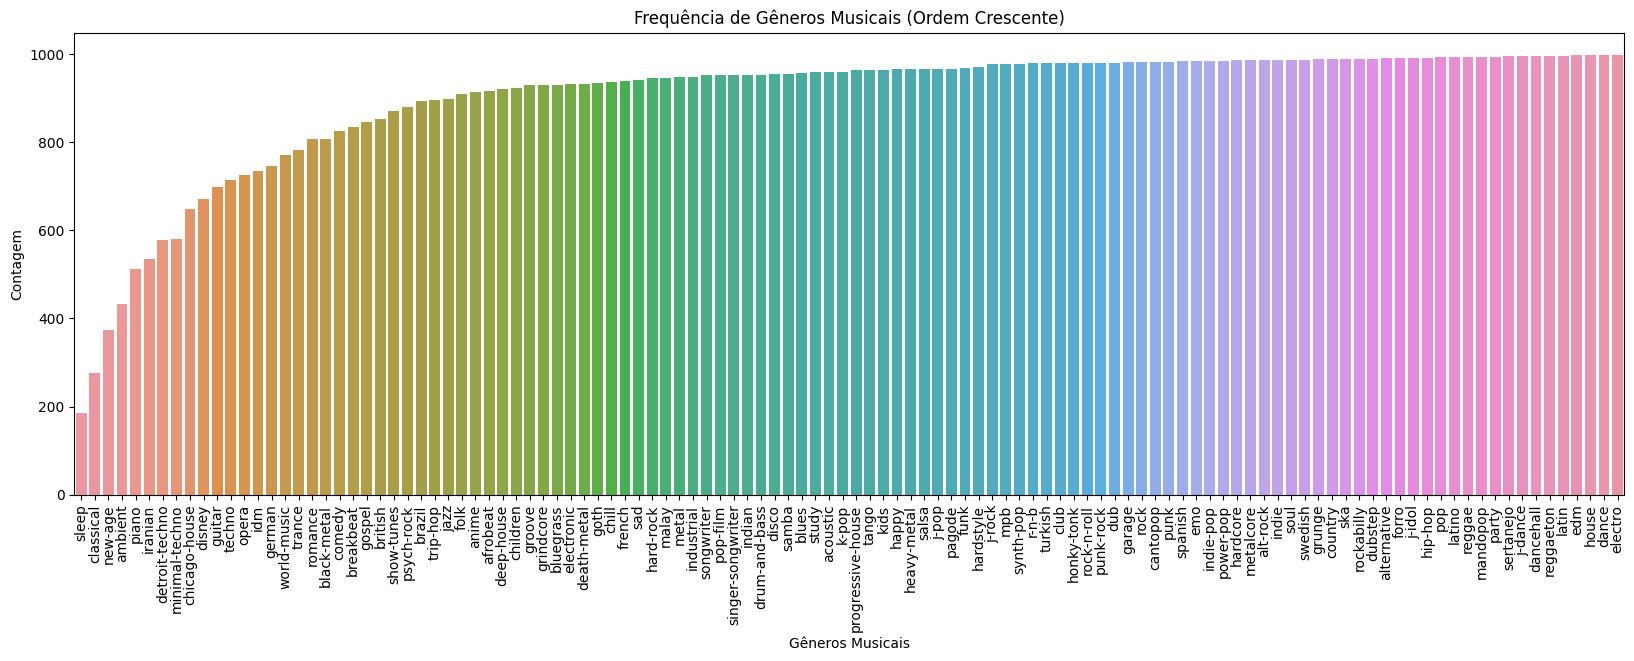

In [111]:
plt.figure(figsize=(20, 6))

generos = genres_limpo['track_genre'].value_counts().sort_values()

ax = sns.barplot(x=generos.index, y=generos) #para dados cartegóricos usar o barplot
ax.set_title('Frequência de Gêneros Musicais (Ordem Crescente)')
ax.set_xlabel('Gêneros Musicais')
ax.set_ylabel('Contagem')

plt.xticks(rotation=90)
plt.show()

#Qual a média de duração das faixas por gênero?

Para ver qual era a média da duração das faixas por gênero, foi feita a união dos gêneros com a respectiva duração média de cada.
E, a partir disso, conseguimos plotar um histograma para visualizar os resultados.


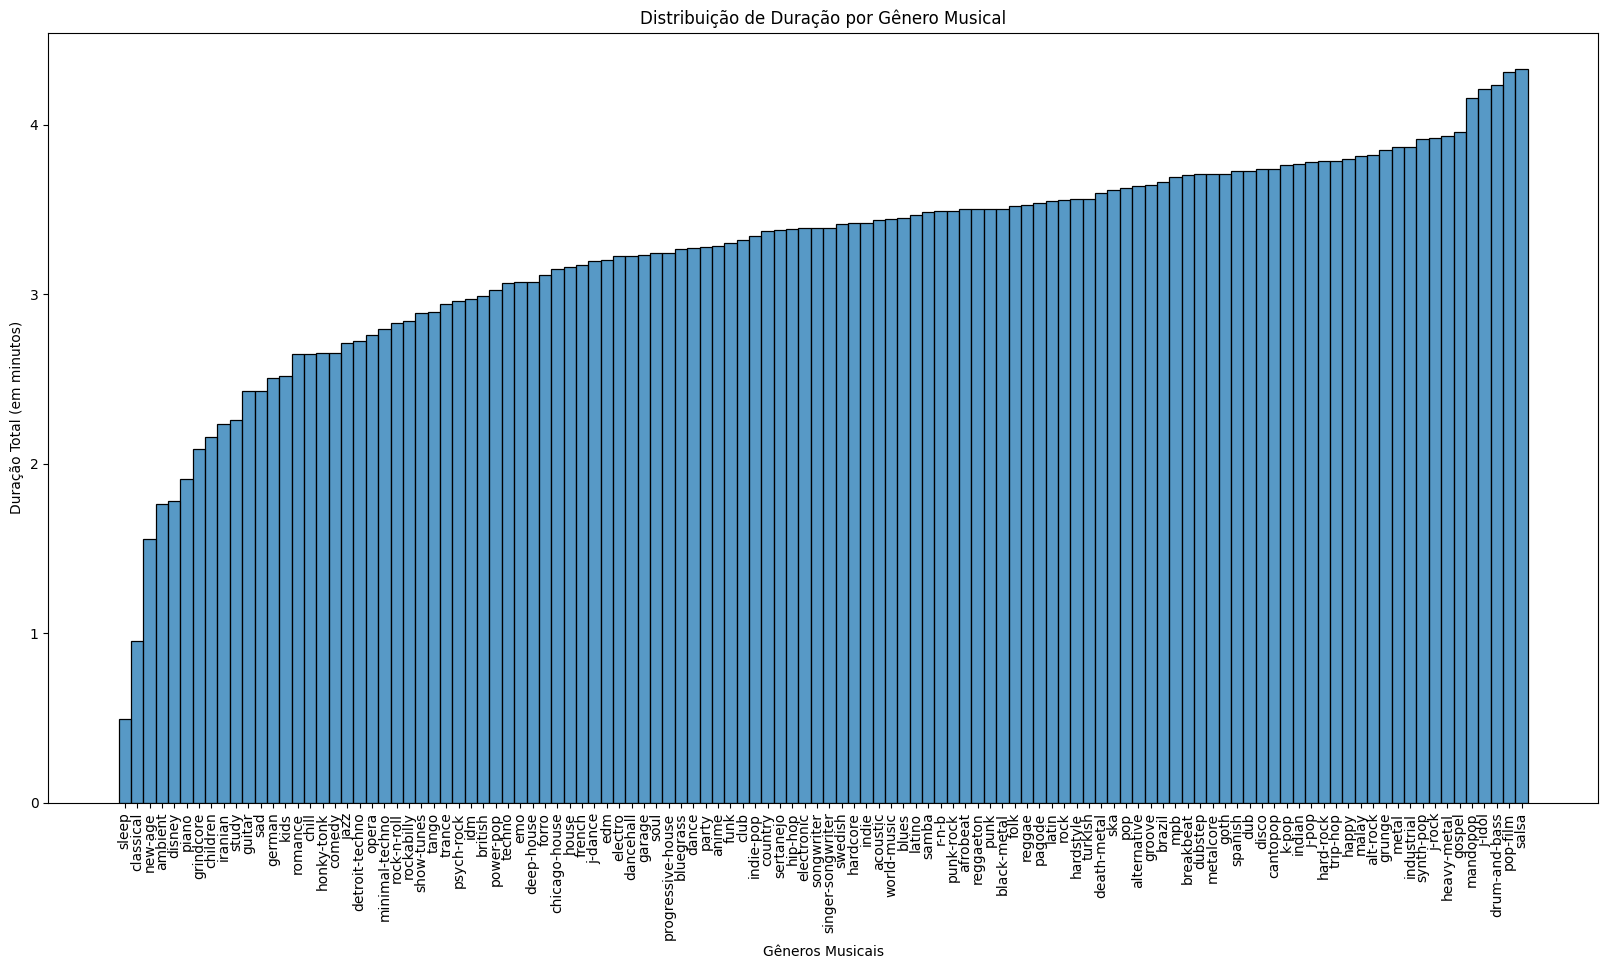

In [112]:
genres_duracao = genres_limpo.groupby('track_genre')['duration_m'].sum()/1000
genres_duracao = genres_duracao.sort_values()

plt.figure(figsize=(20, 10))
ax = sns.histplot(x=genres_duracao.index, weights=genres_duracao.values, bins=20)
ax.set_title('Distribuição de Duração por Gênero Musical')
ax.set_xlabel('Gêneros Musicais')
ax.set_ylabel('Duração Total (em minutos)')

plt.xticks(rotation=90, ha='center')
plt.show()


In [113]:
genres_duracao.sort_values(ascending = False).head(20)

track_genre
salsa            4.326450
pop-film         4.312490
drum-and-bass    4.233125
j-idol           4.212128
mandopop         4.157576
gospel           3.956366
heavy-metal      3.932605
j-rock           3.923038
synth-pop        3.912327
industrial       3.870367
metal            3.865779
grunge           3.848709
alt-rock         3.823054
malay            3.817410
happy            3.794894
trip-hop         3.785815
hard-rock        3.782870
j-pop            3.778403
indian           3.769378
k-pop            3.763567
Name: duration_m, dtype: float64

Assim, "salsa" é o gênero com o maior tempo médio por músicas acompanhado, logo em seguida, de "pop-film".

#Quais são os gêneros mais populares?

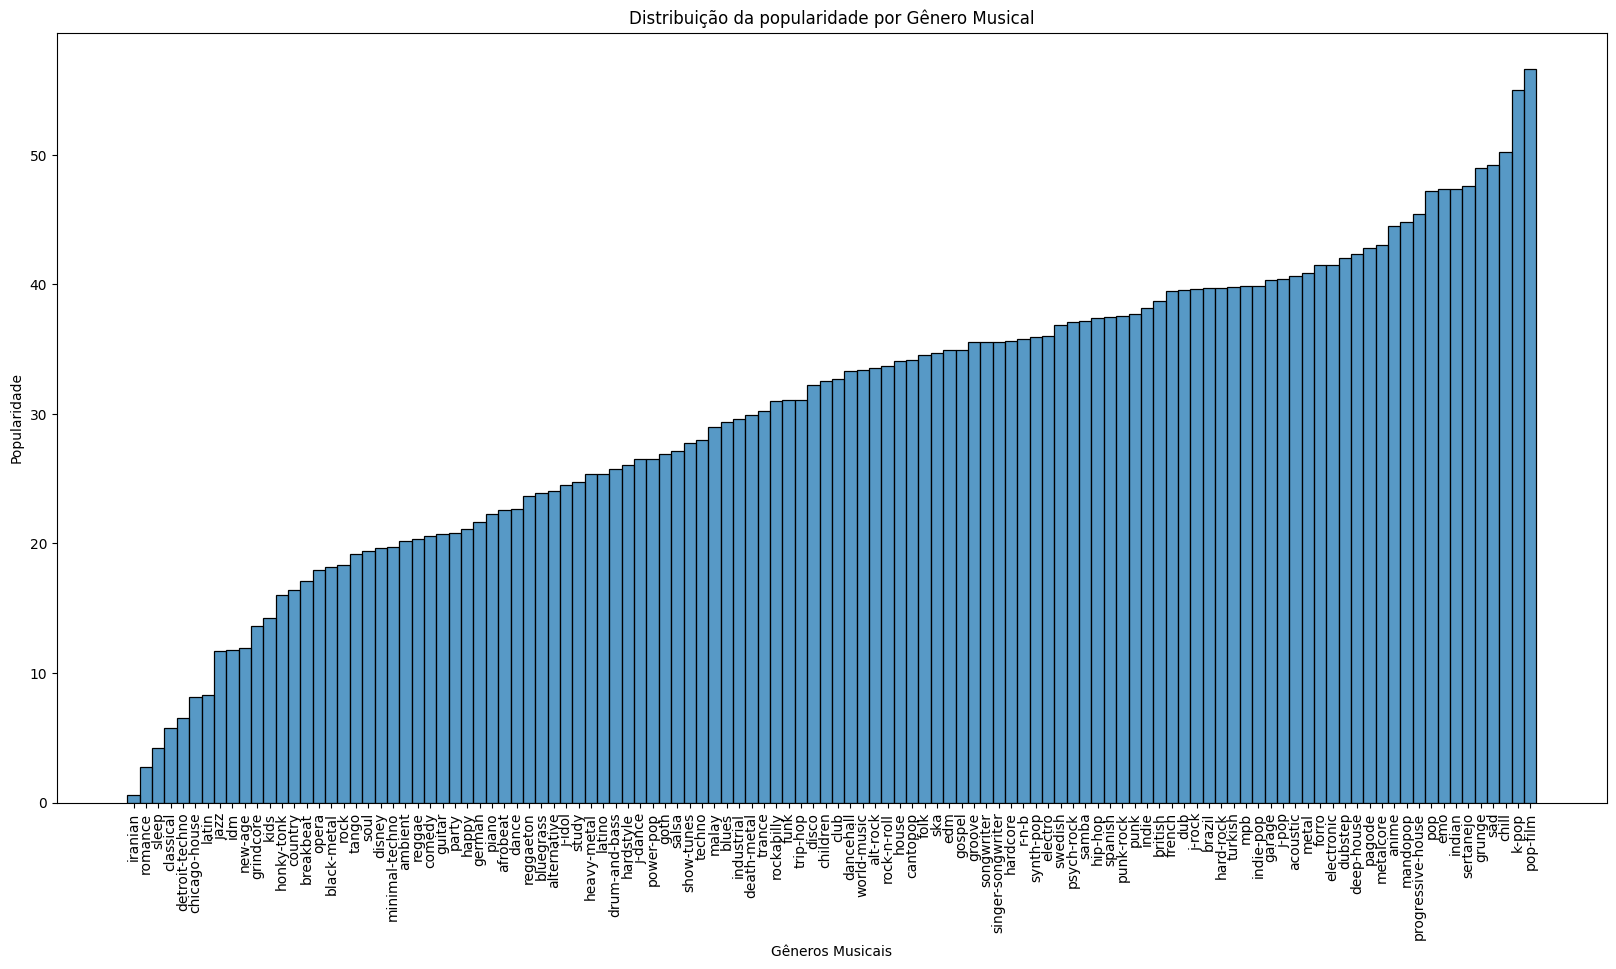

In [114]:
genres_popularidade = genres_limpo.groupby('track_genre')['popularity'].sum()/1000
genres_popularidade = genres_popularidade.sort_values()

plt.figure(figsize=(20, 10))
ax = sns.histplot(x=genres_popularidade.index, weights=genres_popularidade.values, bins=20)
ax.set_title('Distribuição da popularidade por Gênero Musical')
ax.set_xlabel('Gêneros Musicais')
ax.set_ylabel('Popularidade')

plt.xticks(rotation=90, ha='center')
plt.show()

O mesmo processo foi feito para ver a popularidade de cada gênero. Assim, é possível perceber que o gênero "pop-film" possui a segunda maior duração e é também o mais popular. Entretanto, os outros gêneros de longa duração não aparecem logo no início dos 20 mais populares.

In [115]:
genres_popularidade.sort_values(ascending = False).head(20)

track_genre
pop-film             56.602
k-pop                55.004
chill                50.253
sad                  49.233
grunge               48.984
sertanejo            47.608
indian               47.355
emo                  47.328
pop                  47.172
progressive-house    45.408
mandopop             44.796
anime                44.542
metalcore            43.003
pagode               42.800
deep-house           42.363
dubstep              42.018
electronic           41.493
forro                41.464
metal                40.915
acoustic             40.631
Name: popularity, dtype: float64

Também foi analisado quais gêneros possuem maior danceabilidade e, como esperado, alguns gêneros conhecidos apareceram no início como "j-dance" e "dance".

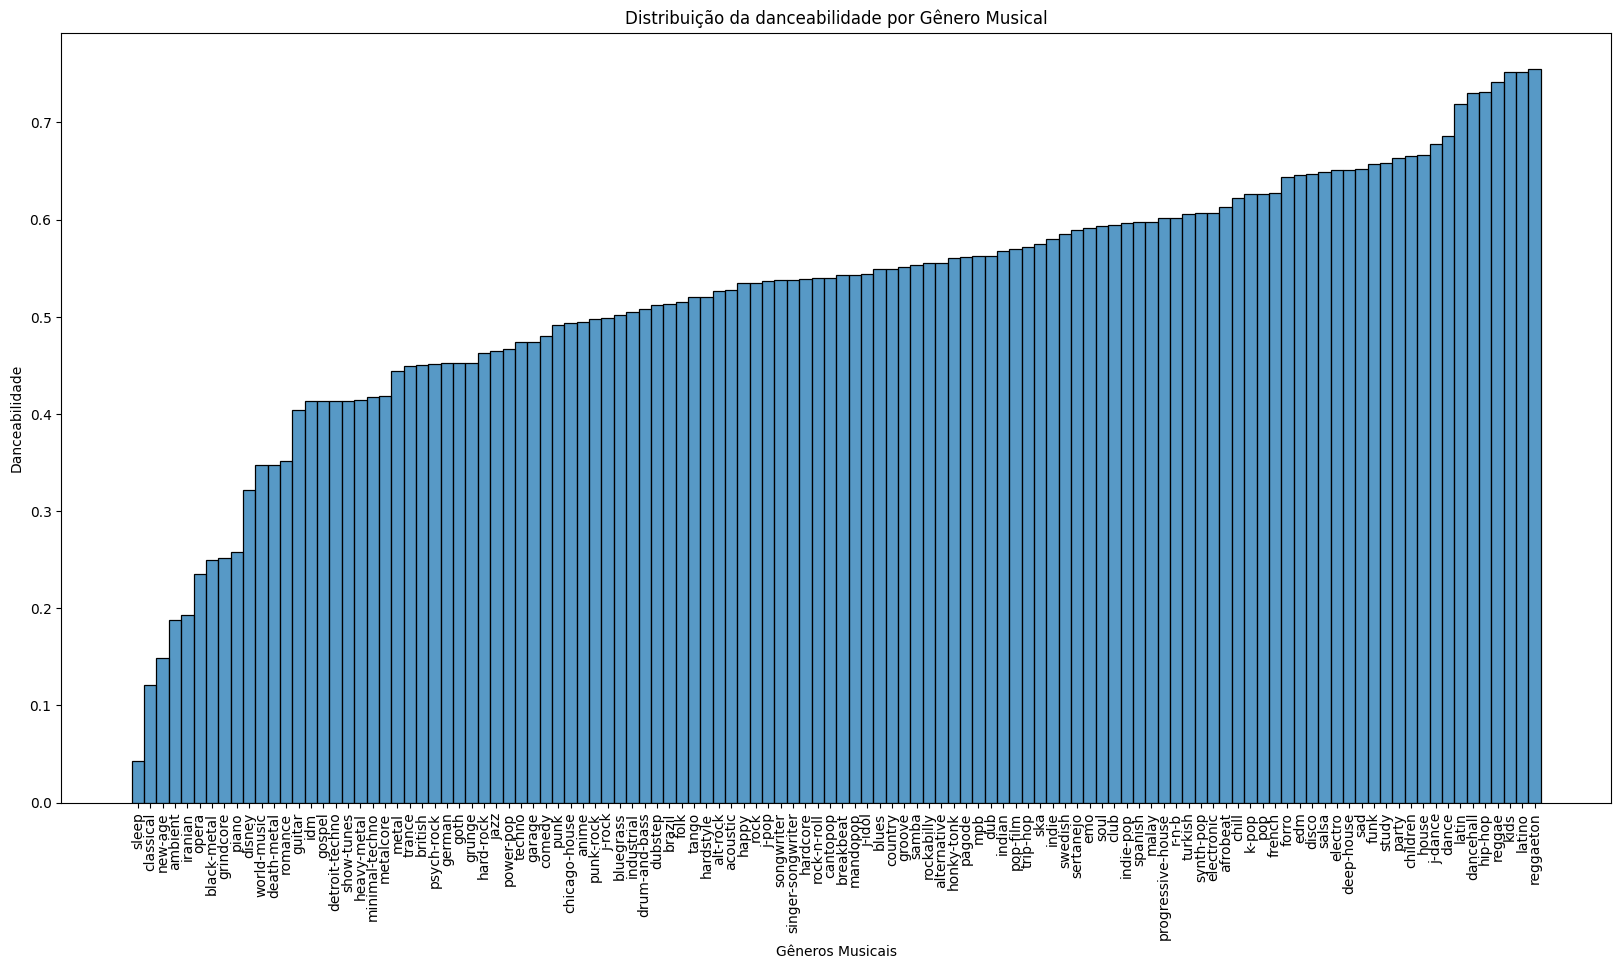

In [116]:
genres_danceabilidade = genres_limpo.groupby('track_genre')['danceability'].sum()/1000
genres_danceabilidade = genres_danceabilidade.sort_values()

plt.figure(figsize=(20, 10))
ax = sns.histplot(x=genres_danceabilidade.index, weights=genres_danceabilidade.values, bins=20)
ax.set_title('Distribuição da danceabilidade por Gênero Musical')
ax.set_xlabel('Gêneros Musicais')
ax.set_ylabel('Danceabilidade')

plt.xticks(rotation=90, ha='center')
plt.show()

In [117]:
genres_danceabilidade.sort_values(ascending = False).head(20)

track_genre
reggaeton     0.754740
latino        0.751852
kids          0.751819
reggae        0.741403
hip-hop       0.730900
dancehall     0.730291
latin         0.719358
dance         0.685962
j-dance       0.677485
house         0.666781
children      0.665094
party         0.663472
study         0.657980
funk          0.657526
sad           0.651768
deep-house    0.651167
electro       0.650996
salsa         0.649511
disco         0.647027
edm           0.646251
Name: danceability, dtype: float64

Outra checagem feita foi com relação aos gêneros que possuem uma quantidade maior de conteúdo explícito em sua música. Em primeiro lugar, como esperado, ficou 'comedy'.

In [118]:
musicas_mais_danca= genres_limpo[['track_id','track_name', 'artists', 'track_genre', 'danceability']].sort_values(by='danceability', ascending=False).head(20)
musicas_mais_danca

track_id  \
111635  4xKKIS9g9nivSiE7TtgR6V   
66576   5kgT25LfYrXXMqNG2ia0O6   
66793   2g1EQO48cbVQy3YEGAe7rS   
13353   4Y9XI2RRd9w2Ll0fYVBduE   
13145   2jJaGAIYHRqtESCMgTOlD5   
94006   6Pgmqg15yVexuOgtzuxwoX   
14119   27iOGgZhoVyb7FWuukbwus   
66777   1XGyurS0isZcUnRcilNGYh   
66635   0AaEbPXWdeiW6MbW80Eibj   
66062   4QOZT2pX8DNcC81fa8p2fR   
78750   7z4VPtZm9g9dxC83ratUFM   
14110   78RBF5yhod2Oc20aaeMOuU   
66009   7z4VPtZm9g9dxC83ratUFM   
13168   7x1oAHeqm6nQ45L4VaRPVY   
66731   5bwnexvD5cm2E7Wl75mQ1x   
66767   5bwnexvD5cm2E7Wl75mQ1x   
60991   6I4WkJKGbgjQ2tF8vIADTh   
14062   3haP3mk7a0lb2VJ5Psg2hU   
66549   36u8tTRE3sdA3SKXduvLMn   
8891    6ENifBjrslwLx69tQFzHvj   

                                               track_name  \
111635                                           Sol Clap   
66576                                       Medicaid Baby   
66793   Featuring Mixx Master Lee, Red Rum & J. Smoov ...   
13353                                             Bitches   
13145                                   Plastik Fantastik   
94006                                  Dancing in My Room   
14119                     The Soccer Song (Football Song)   
66777                                       Peanut Butter   
66635           Casper Cha-Cha Slide (Live Platinum Band)   
66062                                       Go Lay Lay Go   
78750                          Round and Round The Garden   
14110                                      Hot Cross Buns   
66009                          Round and Round The Garden   
13168                                         Most Wanted   
66731                                      Breakfast Time   
66767                                      Breakfast Time   
60991                                 Betray Di Gaza Boss   
14062                                 First Day of School   
66549                          Do You Know Your Alphabet?   
8891                              Sothern Soul Party Mood   

                          artists    track_genre  danceability  
111635                    Quantic       trip-hop         0.985  
66576           That Girl Lay Lay           kids         0.984  
66793             Mixx Master Lee           kids         0.981  
13353                     dj funk  chicago-house         0.981  
13145           Felix Da Housecat  chicago-house         0.980  
94006                    347aidan            sad         0.980  
14119                   CoComelon       children         0.979  
66777   Blake Rules;Netherfriends           kids         0.978  
66635             Casper & Col'ta           kids         0.978  
66062           That Girl Lay Lay           kids         0.977  
78750          The Palace Singers          party         0.976  
14110                   CoComelon       children         0.976  
66009          The Palace Singers           kids         0.976  
13168                  Fast Eddie  chicago-house         0.976  
66731   Blake Rules;Netherfriends           kids         0.975  
66767   Blake Rules;Netherfriends           kids         0.975  
60991       Vybz Kartel;Tommy Lee        j-dance         0.975  
14062                   CoComelon       children         0.975  
66549              Mark D. Pencil           kids         0.975  
8891                  Karen Wolfe          blues         0.975

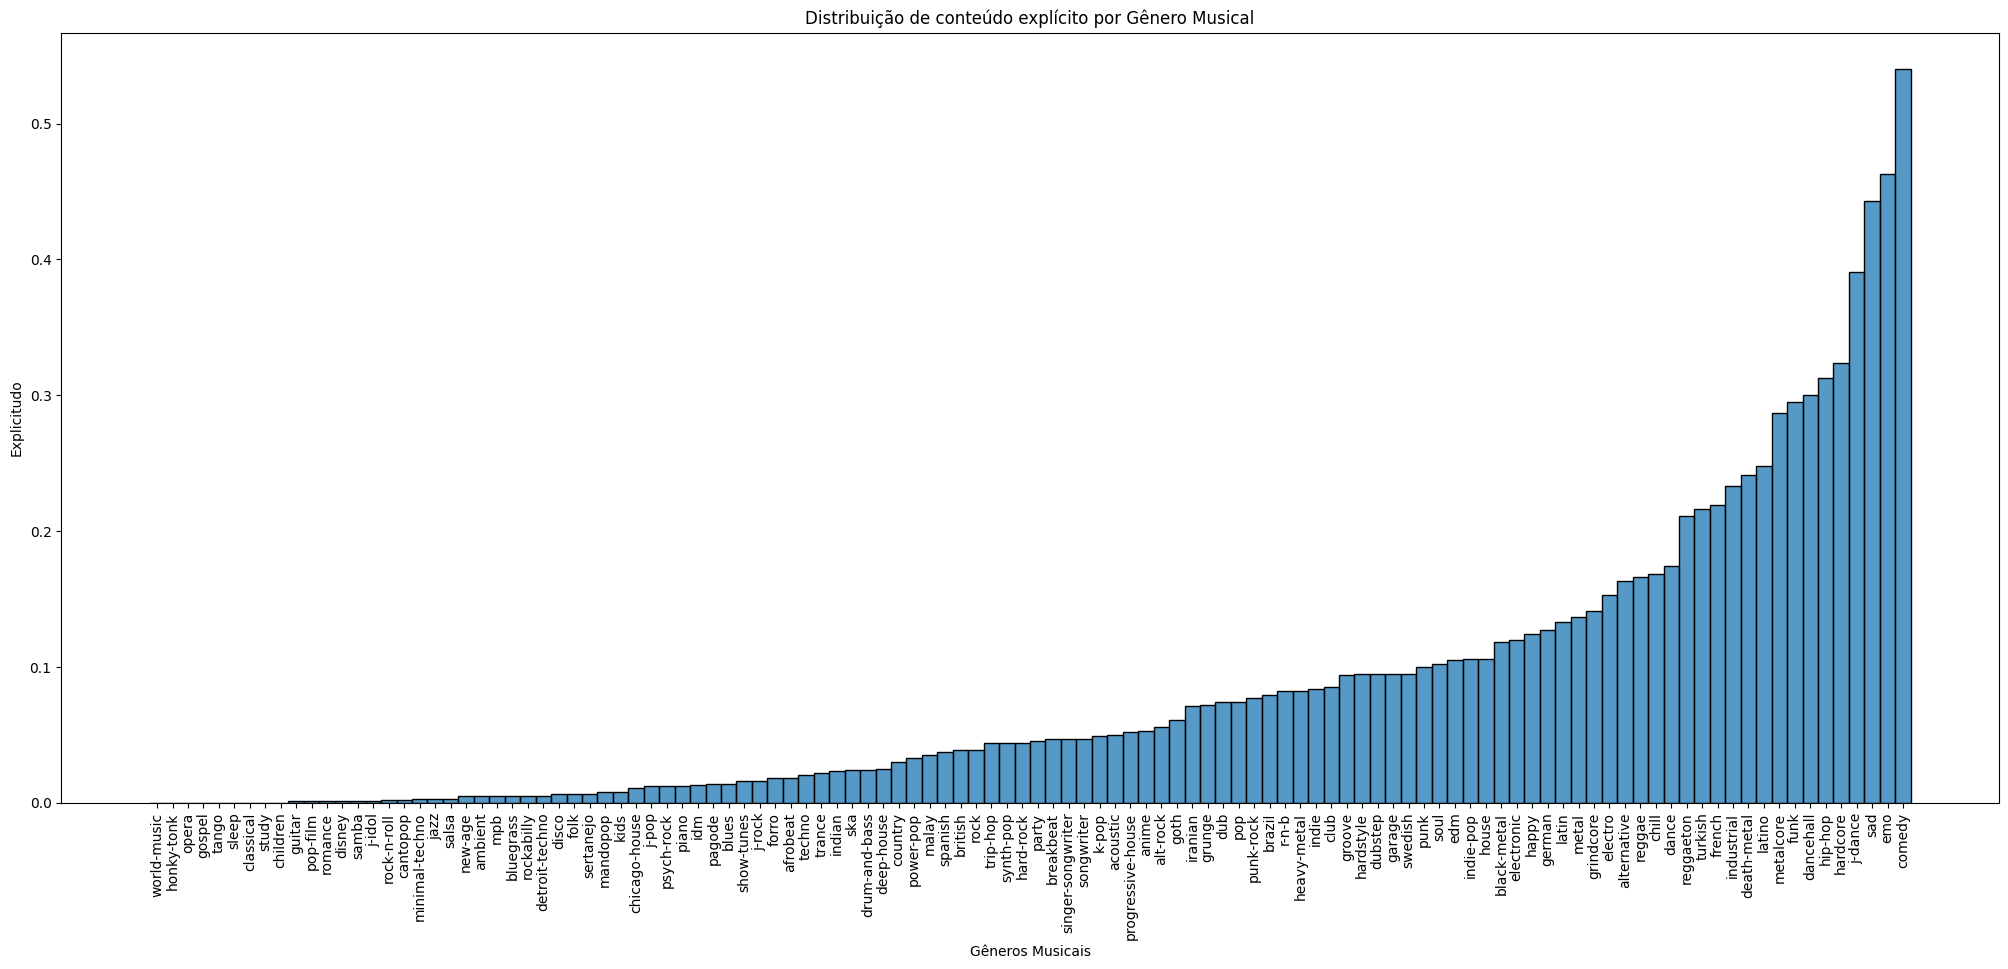

In [119]:
genres_explicit = genres_limpo.groupby('track_genre')['explicit'].sum()/1000
genres_explicit = genres_explicit.sort_values()

plt.figure(figsize=(25, 10))
ax = sns.histplot(x=genres_explicit.index, weights=genres_explicit.values, bins=20)
ax.set_title('Distribuição de conteúdo explícito por Gênero Musical')
ax.set_xlabel('Gêneros Musicais')
ax.set_ylabel('Explicitudo')

plt.xticks(rotation=90, ha='center')
plt.show()

In [120]:
genres_explicit.sort_values(ascending = False).head(20)

track_genre
comedy         0.540
emo            0.463
sad            0.443
j-dance        0.391
hardcore       0.324
hip-hop        0.313
dancehall      0.300
funk           0.295
metalcore      0.287
latino         0.248
death-metal    0.241
industrial     0.233
french         0.219
turkish        0.216
reggaeton      0.211
dance          0.174
chill          0.168
reggae         0.166
alternative    0.163
electro        0.153
Name: explicit, dtype: float64

Também foi feita a checagem com relação a "loudness", que é a intensidade da faixa por dB, dos gêneros.

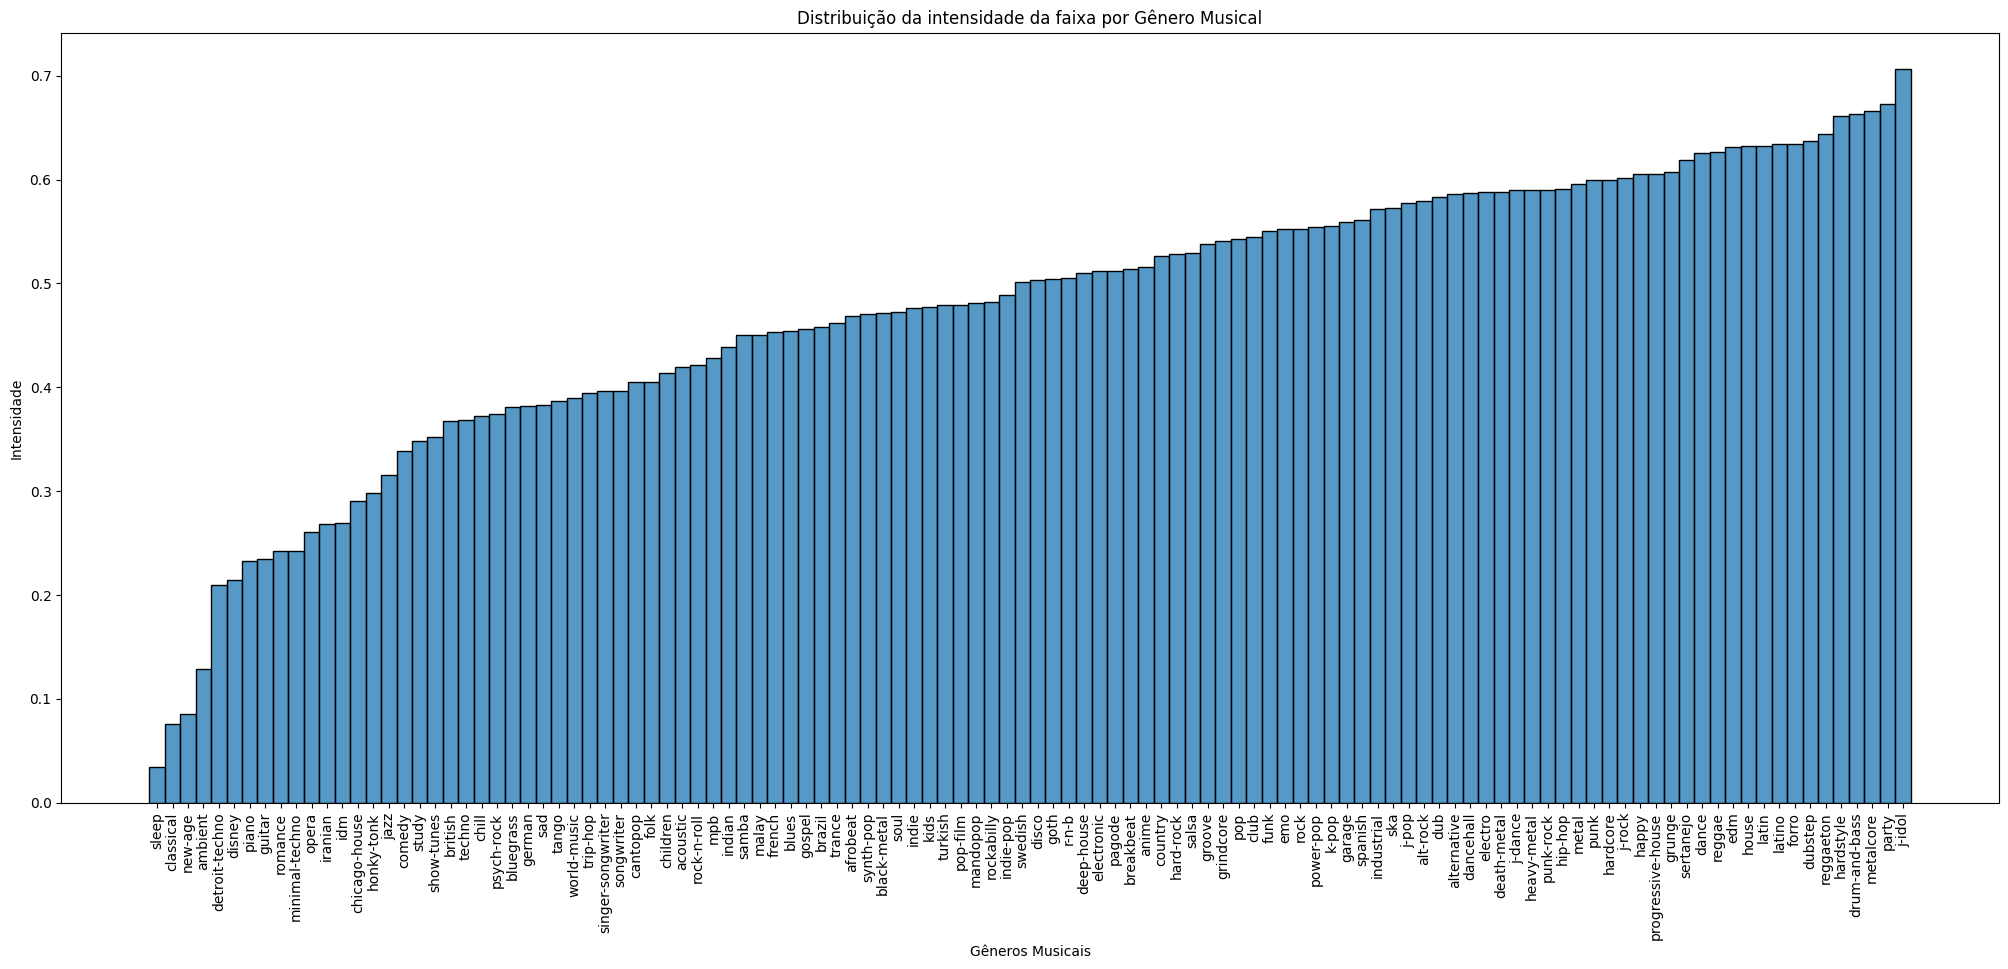

In [121]:
genres_loudness = genres_limpo.groupby('track_genre')['loudness'].sum()/1000
genres_loudness = genres_loudness.sort_values()

plt.figure(figsize=(25, 10))
ax = sns.histplot(x=genres_loudness.index, weights=genres_loudness.values, bins=20)
ax.set_title('Distribuição da intensidade da faixa por Gênero Musical')
ax.set_xlabel('Gêneros Musicais')
ax.set_ylabel('Intensidade')

plt.xticks(rotation=90, ha='center')
plt.show()

In [122]:
genres_loudness.sort_values(ascending = False).head(20)

track_genre
j-idol               0.706178
party                0.672482
metalcore            0.665758
drum-and-bass        0.662868
hardstyle            0.661088
reggaeton            0.643489
dubstep              0.637087
forro                0.634590
latino               0.634062
latin                0.632077
house                0.631955
edm                  0.630855
reggae               0.626788
dance                0.625438
sertanejo            0.618684
grunge               0.607036
progressive-house    0.605676
happy                0.605126
j-rock               0.601358
hardcore             0.599825
Name: loudness, dtype: float64

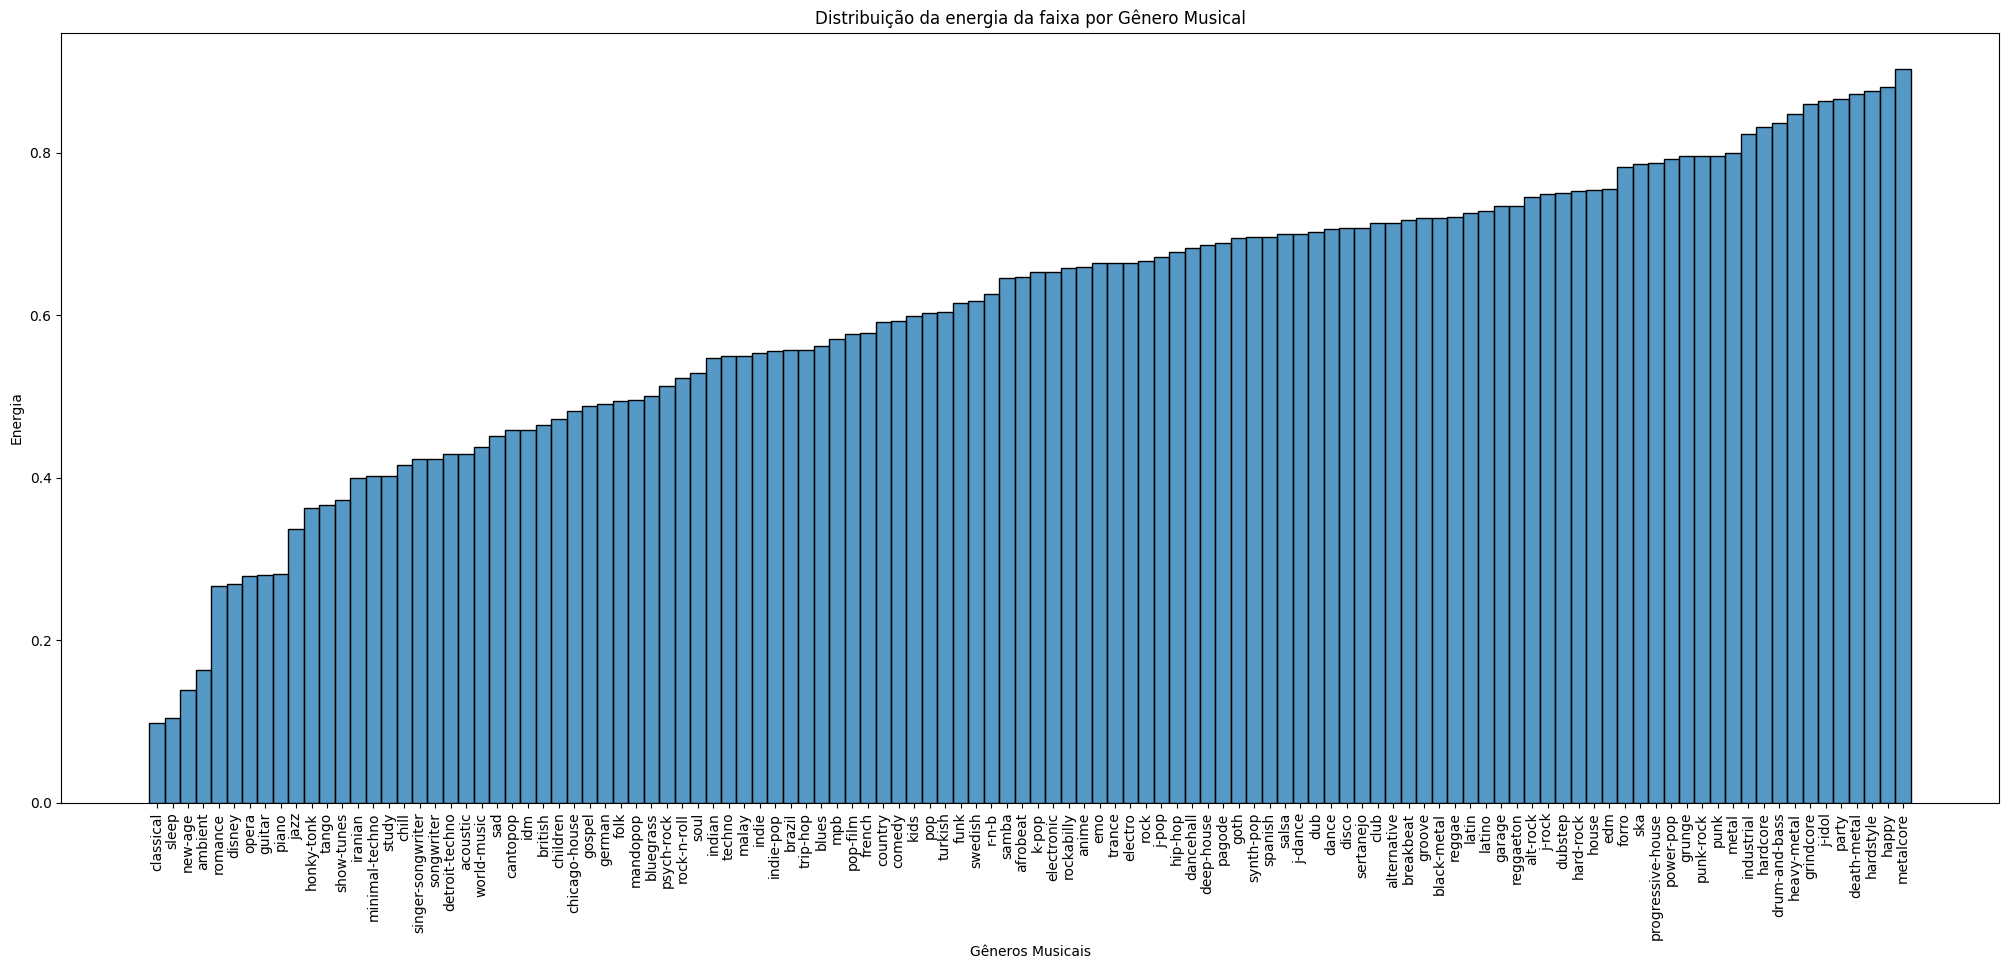

In [123]:
genres_energy = genres_limpo.groupby('track_genre')['energy'].sum()/1000
genres_energy = genres_energy.sort_values()

plt.figure(figsize=(25, 10))
ax = sns.histplot(x=genres_energy.index, weights=genres_energy.values, bins=20)
ax.set_title('Distribuição da energia da faixa por Gênero Musical')
ax.set_xlabel('Gêneros Musicais')
ax.set_ylabel('Energia')

plt.xticks(rotation=90, ha='center')
plt.show()

In [124]:
genres_energy.sort_values(ascending = False).head(20)

track_genre
metalcore            0.902623
happy                0.880583
hardstyle            0.875366
death-metal          0.872398
party                0.866131
j-idol               0.863886
grindcore            0.860080
heavy-metal          0.847600
drum-and-bass        0.836818
hardcore             0.831717
industrial           0.823212
metal                0.799312
punk                 0.795856
punk-rock            0.795711
grunge               0.795463
power-pop            0.792189
progressive-house    0.786824
ska                  0.786090
forro                0.782414
edm                  0.754704
Name: energy, dtype: float64

Pela matriz de correlação, foi possível ver que existe um grande correlação entre "loudness" e "energy". Dessa forma, após vermos quais gêneros possuem  faixas mais intensas e quais possuem faixas com maior energia, fizemos a interseção dos 20 primeiros resultados de ambos. Assim, 13 gêneros foram encontrados na interseção. Provando o dado encontrado na matriz de correlação.

In [125]:
intersecao = pd.merge(genres_loudness.tail(20), genres_energy.tail(20), on='track_genre', how='inner')
intersecao

loudness    energy
track_genre                          
hardcore           0.599825  0.831717
happy              0.605126  0.880583
progressive-house  0.605676  0.786824
grunge             0.607036  0.795463
edm                0.630855  0.754704
forro              0.634590  0.782414
hardstyle          0.661088  0.875366
drum-and-bass      0.662868  0.836818
metalcore          0.665758  0.902623
party              0.672482  0.866131
j-idol             0.706178  0.863886

# Hipótese 1: Músicas explícitas são mais populares?

In [126]:
# calculo da média de popularidade para faixas explícitas e não explícitas
media_popularidade = genres_limpo.groupby('explicit')['popularity'].mean().reset_index()

# Criar um gráfico de barras para comparar a média de popularidade
fig = px.bar(media_popularidade, x='explicit', y='popularity',
             title='Média de Popularidade para Faixas Explícitas e Não Explícitas',
             labels={'explicit': 'Conteúdo Explícito', 'popularity': 'Média de Popularidade'},
             text='popularity', height=400)

# Personalizar rótulos do eixo x
fig.update_xaxes(tickvals=[0, 1], ticktext=['Não Explícito', 'Explícito'])

fig.show()

Sim. Faixas com conteúdo explícito são mais populares do que faixas sem conteúdo explícito. Isso vai um pouco contra o senso-comum, pois é normal achar que faixas sem conteúdo explícito atingiriam um público maior.

#Hipótese 2: Músicas com maior duração são menos populares?

Atributos selecionados para a análise: Duration_m e Popularity

##Frequência dos dados

O gráfico abaixo mostra a distribuição de duração das múscias, em que é possível ver que a maioria se encontra no centro, entre 3 e 4 minutos.

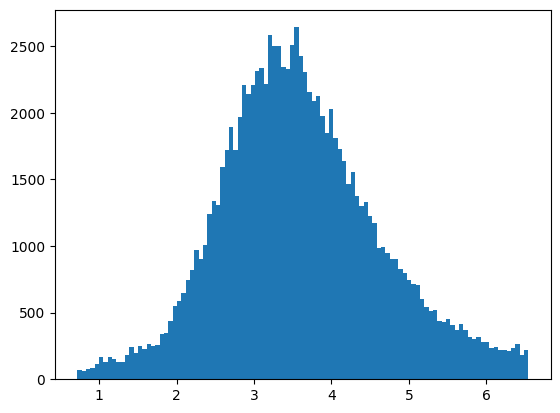

In [127]:
plt.hist(genres_limpo['duration_m'], bins='auto')
plt.show()

No gráfico de popularidade há muito mais músicas com nota 0 que nota 100.

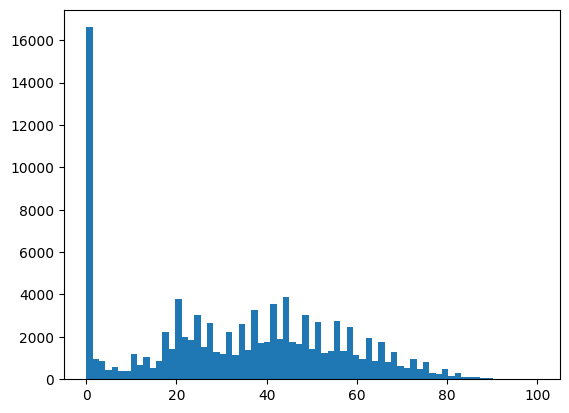

In [128]:
plt.hist(genres_limpo['popularity'], bins='auto')
plt.show()

No gráfico de dispersão com ambas as variáveis observa-se que não há uma relação entre elas, pois os dados estão bem dispersos.

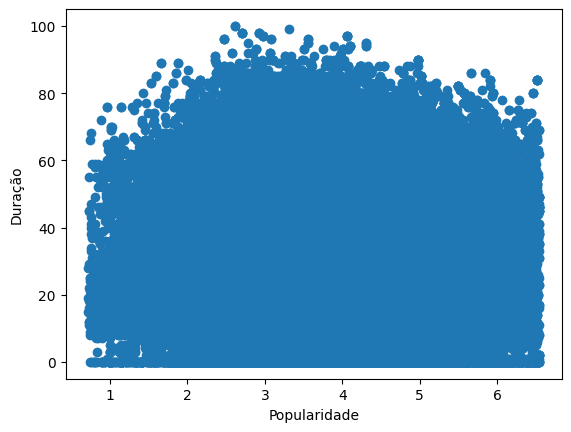

In [129]:
plt.scatter(genres_limpo['duration_m'], genres_limpo['popularity'])
plt.xlabel('Popularidade')
plt.ylabel('Duração')
plt.show()

##Mínimos e Máximos

O máximo da popularidade é 100 e o mínimo é 0, o que mostra uma grande distribuição dos dados.

In [130]:
fig = px.box(genres_limpo, y="popularity")
fig.show()

A duração máxima é 6,54 minutos e a mínima é 0,71 minutos. Os dados estão mais concentrados em um menor intervalo, pois os outliers foram retirados.

In [131]:
fig = px.box(genres_limpo, y="duration_m")
fig.show()

##Posição central do dataset

In [132]:
genres_limpo['duration_m'].describe()

count    102753.000000
mean          3.602372
std           1.036785
min           0.716667
25%           2.908650
50%           3.516667
75%           4.223317
max           6.544267
Name: duration_m, dtype: float64

In [133]:
genres_limpo['popularity'].describe()

count    102753.000000
mean         33.734490
std          22.494234
min           0.000000
25%          18.000000
50%          35.000000
75%          51.000000
max         100.000000
Name: popularity, dtype: float64

##Medida de variabilidade ou dispersão dos dados

Abaixo é calculado o desvio padrão da duração, que indica uma certa dispersão dos dados como foi visto mais acima no gráfico.

In [134]:
np.std(genres_limpo['duration_m'])

1.0367799586015023

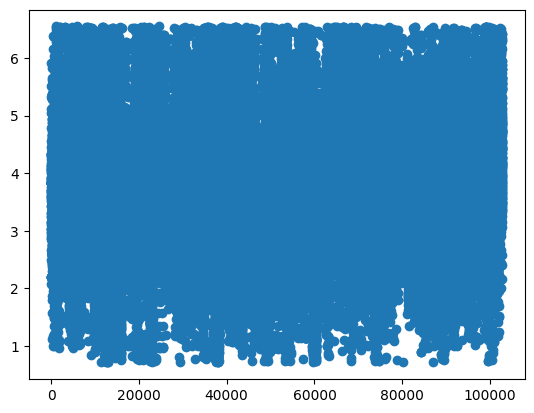

In [135]:
plt.scatter(np.arange(len(genres_limpo['duration_m'])), genres_limpo['duration_m'])
plt.show()

Já os valores da popularidade estão bem dispersos.

In [136]:
np.std(genres_limpo['popularity'])

22.49412453932282

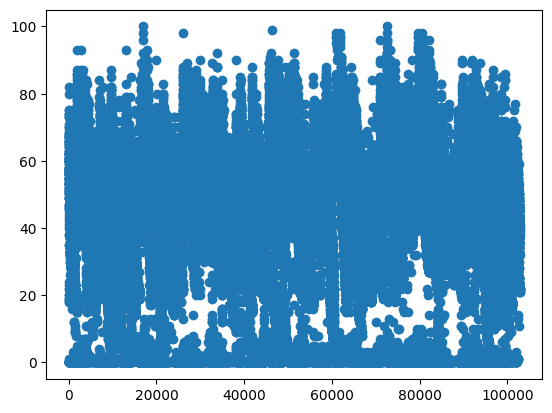

In [137]:
plt.scatter(np.arange(len(genres_limpo['popularity'])), genres_limpo['popularity'])
plt.show()

##Outliers
Haviam outliers somente na duração das músicas e eles foram retirados.

##Simetria dos dados

In [138]:
genres_limpo['duration_m'].mean()

3.6023723461439894

In [139]:
genres_limpo['duration_m'].median()

3.5166666666666666

Levando em conta que a média e a mediana da duração, é possível afirmar que os dados desse atributo possuem uma certa simetria.

In [140]:
genres_limpo['popularity'].mean()

33.73448950395609

In [141]:
genres_limpo['popularity'].median()

35.0

Os dados da popularidade também são quase simétricos.

##Conslusão
Músicas com maior duração não são menos populares, pois é possível ver que não há uma relação entre as duas vairáveis, portanto a duração não influencia na popularidade de uma música.

#Hipótese 3: Músicas mais alegres são mais dançáveis?

Atributos selecionados para a análise: Danceability e Valence

##Frequência dos dados

Os valores de dançabilidade estão mais concentrados entre 0.5 e 0.7.

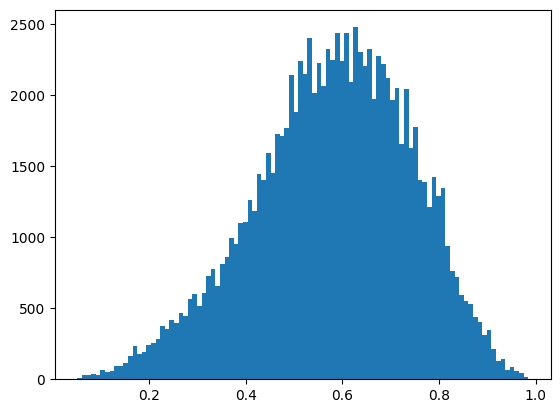

In [ ]:
plt.hist(genres_limpo['danceability'], bins='auto')
plt.show()

Já os de valence estão bem mais distribuídos.

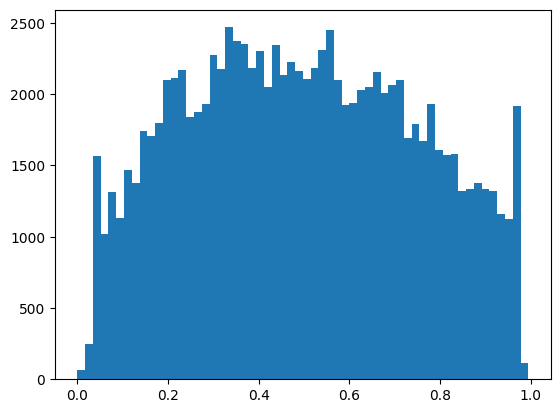

In [ ]:
plt.hist(genres_limpo['valence'], bins='auto')
plt.show()

No gráfico de dispersão, observa-se uma certa correlação entre os atributos, pois à medida que um cresce o outro também tem esse comportamento.

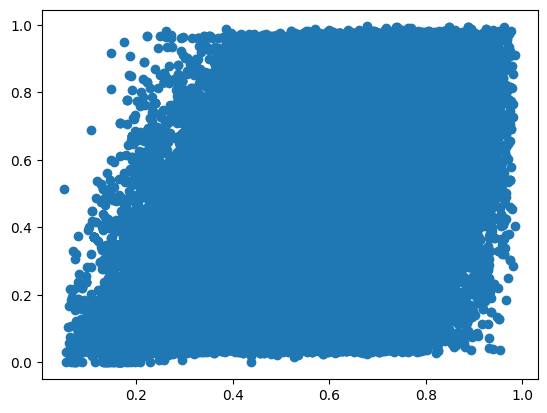

In [ ]:
plt.scatter(genres_limpo['danceability'], genres_limpo['valence'])
plt.show()

O que pode se confirmar pela correlação de 0.436, que mostra uma certa relação entre eles.

In [ ]:
genres_limpo[['danceability', 'valence']].corr()

danceability   valence
danceability      1.000000  0.436311
valence           0.436311  1.000000

##Mínimos e Máximos

O máximo de dançabilidade de uma música é 0,985 e o mínimo é 0,0513. Apesar do intervalo pequeno, é possível ver que estão bem distribuídos.

In [ ]:
fig = px.box(genres_limpo, y="danceability")
fig.show()

O máximo de valence é 0,995 e o mínimo é 0, o que também mostra uma certa dispersão.

In [ ]:
fig = px.box(genres_limpo, y="valence")
fig.show()

##Posição central do dataset

In [ ]:
genres_limpo['danceability'].describe()

count    102753.000000
mean          0.580060
std           0.162049
min           0.051300
25%           0.475000
50%           0.590000
75%           0.699000
max           0.985000
Name: danceability, dtype: float64

In [ ]:
genres_limpo['valence'].describe()

count    102753.000000
mean          0.495839
std           0.251554
min           0.000000
25%           0.293000
50%           0.488000
75%           0.697000
max           0.995000
Name: valence, dtype: float64

##Medida de variabilidade ou dispersão dos dados

Utilizando novamente o desvio padrão, por estar mais próximo de 0, indica que os dados estão mais concentrados.

In [ ]:
np.std(genres_limpo['danceability'])

0.16204786819386802

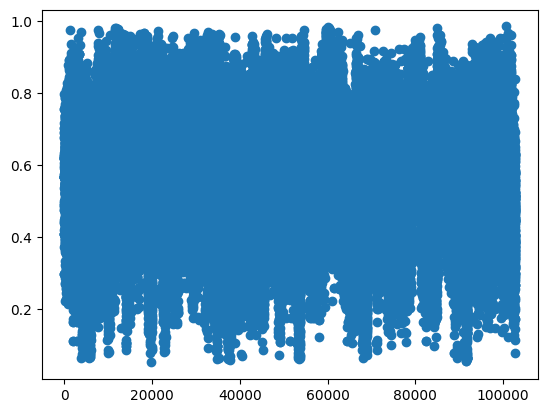

In [ ]:
plt.scatter(np.arange(len(genres_limpo['danceability'])), genres_limpo['danceability'])
plt.show()

In [ ]:
np.std(genres_limpo['valence'])

0.2515527014834809

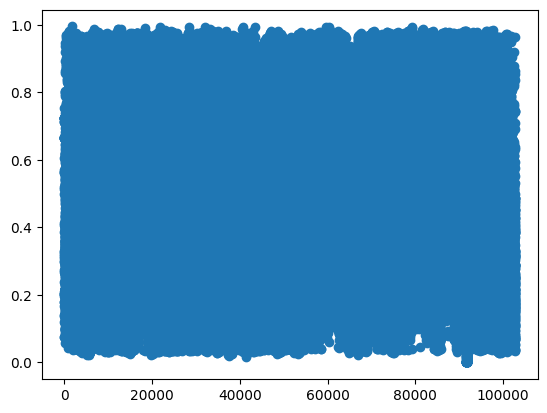

In [ ]:
plt.scatter(np.arange(len(genres_limpo['valence'])), genres_limpo['valence'])
plt.show()

##Outliers
Haviam outliers somente na duração das músicas e eles foram retirados.

##Simetria dos dados

In [ ]:
genres_limpo['danceability'].mean()

0.5800598493474644

In [ ]:
genres_limpo['danceability'].median()

0.59

Levando em conta que a média e a mediana da duração, é possível afirmar que os dados desse atributo possuem uma certa simetria.

In [ ]:
genres_limpo['valence'].mean()

0.495839399920197

In [ ]:
genres_limpo['valence'].median()

0.488

Os dados da popularidade também são quase simétricos.

##Conclusão
Sim, músicas com maior valence são mais dançáveis, pois vê-se pela maior correlação entre os dados e como as variáveis crescem juntas no gráfico de dispersão. Esse comportamento faz sentido, uma vez que músicas que transmitem mais o sentimento de positividade/animação são normalmente tocadas em festas e comemorações, onde o sentimento de alegria é mais presente.